---
title: graphviz를 이용해 그림 그리기 
category: python-lib
tags: python python-lib graphviz matplotlib networkx

---

## intro

- 보통 python에서 그림을 그릴 때는 `matplotlib.pyplot`을 사용해서 그리는 일이 많기는 합니다만, 네트워크를 그릴때는 생각만큼 예쁘게 나오지 않는 일들이 많습니다. 
- 그래서 찾아보니 `graphviz`를 이용하면 좀 예쁘게 르리 수 있다는 것 같아서 이를 어떻게 사용할 수 있는지를 정리해보기로 했습니다.
    - 특히 `networkx`와 함께 사용하면 좀 더 예쁘게 그릴 수 있을 것 같아요. 
    - 책 'primer on process mining'에서도 graphviz를 사용함

### what is `graphviz`

- Graphviz (short for Graph Visualization Software) is a package of open-source tools initiated by AT&T Labs Research for **drawing graphs specified in DOT language scripts**.
    - https://en.wikipedia.org/wiki/Graphviz
    - 한국어로 변경하자면 `dot language`를 활용한 그래프를 그리기 위한 오픈소스 툴이라고 할 수 있겠네요. 

#### what is dot language??

- python도 못하는데 또 무슨 언어를 배워 시벌 이라고 생각할 수 있지만, 뭐 간단한것만 알면 됩니다. 
- `plain text graph description language`라고 합니다. 텍스트로 표현한 그래프 표현언어 라고 말하면 되겠네요. 
    - 이것만 알고 넘어가고, 궁금하시면 [위키피디아](https://en.wikipedia.org/wiki/DOT_(graph_description_language))를 봅시당

### install `graphviz`

- Graphviz 툴을 설치하고, pygraphviz 를 함께 설치해주어야 합니다. 다만, 모든 라이브러리 설치가 그렇지만 `graphviz`의 경우 설치 중에 문제가 발생하는 일이 정말 많습니다. 인내심이 필요합니다. 
    - [Graphviz](https://graphviz.gitlab.io/download/)
    - [pygrphviz](https://pygraphviz.github.io/download.html)
- 다 설치하고, 파이썬에서 는 `import graphviz` 로 라이브러리 임포트
- [Documentation[(http://graphviz.readthedocs.io/en/stable/manual.html)- 

## dot language example

- 앞서 말한 바와 같이, `dot language`는 텍스트를 활용한 그래프 표현 방법입니다. 따라서, html처럼 텍스트로 표현하고 그것을 dot engine이 렌더링해주는 개념으로 생각하시면 됩니다. 
- 그래서 아래처럼 텍스트로 만들고 파일 경로, 파일 이름, 포맷만 세팅해줍니다. 
- 아래처럼 그냥 `dot language`로 표현된 텍스트를 만들어주고 이를 활용해서 렌더링을 해줘도 아무 문제가 없습니다. 

### dot language 

- 설명을 하는 것보다는 예제 코드와 결과를 보시면서 이해하시는 것이 훨씬 좋습니다. 그래서 다양한 예제를 넣어두었습니다. 
    - dot_language로 표현된 스트링을 넣어도 되고, dot object를 넣어도 됩니다. 

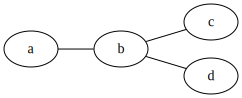

In [151]:
import graphviz 

def save_graph_as_svg(dot_string, output_file_name):
    if type(dot_string) is str:
        g = graphviz.Source(dot_string)
    elif isinstance(dot_string, (graphviz.dot.Digraph, graphviz.dot.Graph)):
        g = dot_string
    g.format='svg'
    g.filename = output_file_name
    g.directory = '../../assets/images/markdown_img/'
    g.render(view=False)
    return g
dot_graph = """
graph graphname {
    rankdir=LR;
     a -- b -- c;
     b -- d;
}"""
save_graph_as_svg(dot_graph, 'simple_dot_example1')


In [152]:
# digraph 
# 단, `--`는 graph에서만 쓰이고 `->`의 경우는 digraph에서만 쓰인다. 서로 다른 그래프에서 이를 마음대로 사용할 수 없음 을 유의하는 것이 좋다. 

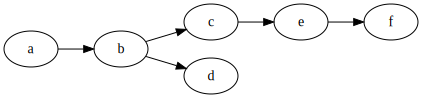

In [153]:
import graphviz 
dot_digraph = """
digraph graphname {
    rankdir=LR;
     a -> b -> c -> e ->f;
     b -> d;
}
"""
save_graph_as_svg(dot_digraph, 'simple_digraph')

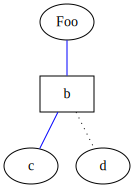

In [154]:
dot_graph_with_decoration = """
graph graphname {
     // This attribute applies to the graph itself
     size="5,5";
     // The label attribute can be used to change the label of a node
     a [label="Foo"];
     // Here, the node shape is changed.
     b [shape=box];
     // These edges both have different line properties
     a -- b -- c [color=blue];
     b -- d [style=dotted];
     // [style=invis] hides a node.
}
"""
save_graph_as_svg(dot_graph_with_decoration, 'graph_with_decoration')

### using graphviz with object

- 이렇게 text로 보는 것도 썩 괜찮은 방법이지만, object를 사용하는 것이 좀 더 개발자에게 적합한 방법이 아닌가? 하는 생각이 듭니다. 
- `networkx`와 유사하게 graphviz.dot.Digraph 나 graphviz.dot.Graph 를 만들고 해당 객체를 다음으로 변화시킵니다. 
    - graph attribute를 변화하거나 
    - node를 추가하거나
    - edge를 추가하거나
    - node attribute 를 변화하거나
    - edge attribute 를 변화하거나
- 결과와 source code를 함께 프린트하였습니다. 

// The Round Table
digraph {
	A
	B
	C
}


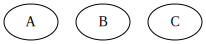

In [178]:
digraph1 = graphviz.Digraph(comment="The Round Table")
digraph1.node("A")
digraph1.node("B")
digraph1.node("C")
print(digraph1.source)
save_graph_as_svg(digraph1, 'round_table1')

// The Round Table
digraph {
	A
	B
	C
	A -> B
	A -> C
	A -> B
	A -> C
}


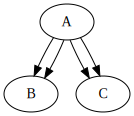

In [179]:
digraph1 = graphviz.Digraph(comment="The Round Table")
digraph1.node("A")
digraph1.node("B")
digraph1.node("C")
digraph1.edge("A", "B")
digraph1.edge("A", "C")
digraph1.edge("A", "B")
digraph1.edge("A", "C")
print(digraph1.source)
save_graph_as_svg(digraph1, 'round_table2')

### Drawing process model using graphviz 

- 이제 지난 번에 alpha algorithm을 활용하여 만든 process model을 graphviz를 활용하여 그려줍니다. 아래는 기존에 만들어둔 코드입니다. 


In [172]:
import networkx as nx
import itertools as ittls
import functools
import matplotlib.pyplot as plt

def return_unique_activities(input_log):
    uniq_act = []
    for trace in input_log:
        for act in trace:
            if act in uniq_act:
                continue
            else:
                uniq_act.append(act)
    return uniq_act
def return_all_direct_succession(input_log):
    return [ (instance[i], instance[i+1]) for instance in input_log for i in range(0, len(instance)-1) ]
def causality_matrix(input_log):
    uniq_activity = return_unique_activities(input_log)
    dir_successions = return_all_direct_succession(input_log)
    
    causality_matrix = { key1: {}for key1 in uniq_activity}
    for a1 in uniq_activity:
        for a2 in uniq_activity:
            if (a1, a2) in dir_successions and (a2, a1) in dir_successions:
                causality_matrix[a1][a2]="||"
            elif (a1, a2) in dir_successions and (a2, a1) not in dir_successions:
                causality_matrix[a1][a2]="->"
            elif (a1, a2) not in dir_successions and (a2, a1) in dir_successions:
                causality_matrix[a1][a2]="<-"
            else:
                causality_matrix[a1][a2]="#"
    return pd.DataFrame(causality_matrix).transpose()
def return_transitions(input_log):
    T_L = return_unique_activities(input_log)
    T_I = list(set( [instance[0] for instance in input_log]))
    T_O = list(set( [instance[-1] for instance in input_log]))
    return (T_L, T_I, T_O)
def find_subsets(lst):
    # A, B 내부 집단의 a끼리, b끼리는 관계가 없고, 모든 a, 모든 b 간에는 direct succession이 있는 것들
    subsets = [list(ittls.combinations(lst, i)) for i in range(1, len(lst)+1)]
    subsets = functools.reduce(lambda x, y: x+y, subsets)
    return subsets
def return_X_L(input_log):
    T_L, T_I, T_O = return_transitions(input_log)
    c_matrix = causality_matrix(input_log)
    A_s = find_subsets(T_L)[:-1]# remove last item
    AB_s = [(A, B) for A in A_s for B in find_subsets( list(set(T_L) - set(A)) )]
    def check_direction(A, B):
        return all( c_matrix.loc()[a][b]=="->" for a in A for b in B)
    def check_no_relation(A, B):
        return all( c_matrix.loc()[a][b]=="#" for a in A for b in B)
    AB_s = filter(lambda AB: check_direction(AB[0], AB[1]), AB_s)
    AB_s = filter(lambda AB: check_no_relation(AB[0], AB[0]), AB_s)
    AB_s = filter(lambda AB: check_no_relation(AB[1], AB[1]), AB_s)
    X_L = list(AB_s)
    return X_L
def return_Y_L(input_log):
    # make it maximal
    X_L = return_X_L(input_log)
    Y_L = X_L.copy()
    remove_lst =[]
    for i in range(0, len(X_L)-1):
        for j in range(i+1, len(X_L)):
            if set(X_L[i][0]).issubset(set(X_L[j][0])):
                if set(X_L[i][1]).issubset(set(X_L[j][1])):
                    if X_L[i] not in remove_lst:
                        remove_lst.append(X_L[i])
    for rem_elem in remove_lst:
        Y_L.remove(rem_elem)
    return Y_L
def return_P_L(input_log):
    T_L, T_I, T_O = return_transitions(input_log)
    Y_L = return_Y_L(input_log)
    P_L = [("P"+str(i+1), {"From":Y_L[i][0], "To":Y_L[i][1]}) for i in range(0, len(Y_L))]
    P_L.insert(0, ("source", {"From":(), "To":[elem for elem in T_I]}))
    P_L.append(("sink", {"From":[elem for elem in T_O], "To":()}))
    return P_L
def return_F_L(input_log):
    P_L = return_P_L(input_log)
    F_L = [(a, p_name) for p_name, p_attr in P_L for a in p_attr["From"]]
    F_L +=[(p_name, a) for p_name, p_attr in P_L for a in p_attr["To"]]
    return F_L
def alpha_algorithm(input_log):
    T_L, T_I, T_O = return_transitions(input_log)
    P_L = return_P_L(input_log)
    F_L = return_F_L(input_log)
    return (P_L, T_L, F_L)     

def PTF_to_DG(P_L, T_L, F_L):
    DG = nx.DiGraph()
    DG.add_nodes_from([(T, {"Type":"transition"}) for T in T_L])
    DG.add_nodes_from([ (P[0], {"Type":"place"}) for P in P_L])
    DG.add_edges_from(F_L)
    return DG

def draw_petri_net(DG, node_pos):
    plt.figure(figsize=(10, 10))
    pos = node_pos
    node_size_lst = [ 100 if node[0]!="source" and node[0]!="sink" else 500 for node in DG.nodes(data=True)]
    node_shape_lst = [ "o" if node[1]["Type"]=="place" else "s" for node in DG.nodes(data=True)]

    nx.draw_networkx_edges(DG, pos)
    nx.draw_networkx_labels(DG, pos, font_color='white')
    for node in DG.nodes(data=True):
        node_shape = "s" if node[1]["Type"]=="transition" else "o"
        node_color = "blue" if node[1]["Type"]=="transition" else "red" if node[0]=="sink" or node[0]=="source" else "green"
        node_size  = 500 if node[0]!="source" and node[0]!="sink" else 1500
        plt.scatter(pos[node[0]][0], pos[node[0]][1], s=node_size, c=node_color, marker=node_shape)
        #nx.draw_networkx_nodes(DG, pos[node[0]], nodelist=node)
    plt.axis('off')

### drawing by matplotlib

- matplotlib로 그리면 다음처럼 그릴 수 있습니다. 썩 이쁜 모양이 아니죠. 

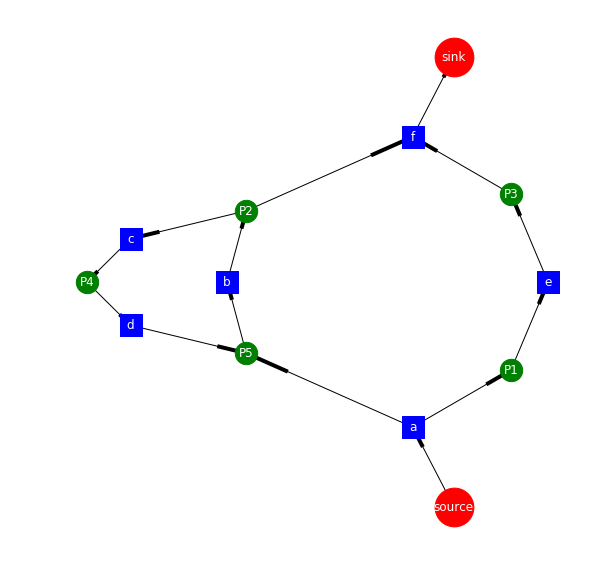

In [173]:
# toy example 
log5 = [['a', 'b', 'e', 'f']]*2 + [['a', 'b', 'e', 'c', 'd', 'b', 'f']]*3 + [['a', 'b', 'c', 'e', 'd', 'b', 'f']]*2
log5 += [['a', 'b', 'c', 'd', 'e', 'b', 'f']]*4 + [['a', 'e', 'b', 'c', 'd', 'b', 'f']]*3
test_log = log5*500


P_L, T_L, F_L = alpha_algorithm(test_log)
DG = PTF_to_DG(P_L, T_L, F_L)
draw_petri_net(DG, nx.spectral_layout(DG))
plt.savefig("../../assets/images/markdown_img/alpha_spectral_layout.png")

### drawing by graphviz

- graphviz.dot.Digraph와 networkx.DiGraph 는 둘다 방향성을 가진 그래프 객체입니다. 따라서 이 둘은 쉽게 변환될 수 있습니다. 
- 앞서 만들었던 `nx.Digraph()`를 이용해서 비교적 쉽게 dot.Digraph로 변환해줍니다. 

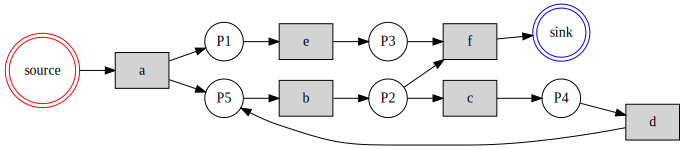

In [177]:
import graphviz
from graphviz import Digraph

def nxDG_to_dotDG(nx_DG):
    dot_process_by_alpha = Digraph(comment="this petri net is derived from alpha algorithm")
    dot_process_by_alpha.attr(rankdir="LR")
    for node in nx_DG.nodes(data=True):
        if node[1]["Type"]=='place':
            if node[0]=="source":
                dot_process_by_alpha.node(node[0], shape="doublecircle", color='red')
            elif node[0]=="sink":
                dot_process_by_alpha.node(node[0], shape="doublecircle", color='blue')
            else:
                dot_process_by_alpha.node(node[0], shape="circle")
        elif node[1]["Type"]=='transition':
            dot_process_by_alpha.node(node[0], shape="rectangle", style='filled')
        else:
            print("error: not defined node type")
    for edge in nx_DG.edges(data=True):
        dot_process_by_alpha.edge(edge[0], edge[1])
    return dot_process_by_alpha
dot_g = nxDG_to_dotDG(DG)
save_graph_as_svg(dot_g, 'alpha_algorithm_dot')